<a href="https://colab.research.google.com/github/joynaomi81/CODSOFT/blob/main/Titanic_Survival_Prediction_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tested.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.shape

(418, 12)

In [ ]:
for col in data.columns:
  print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [ ]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

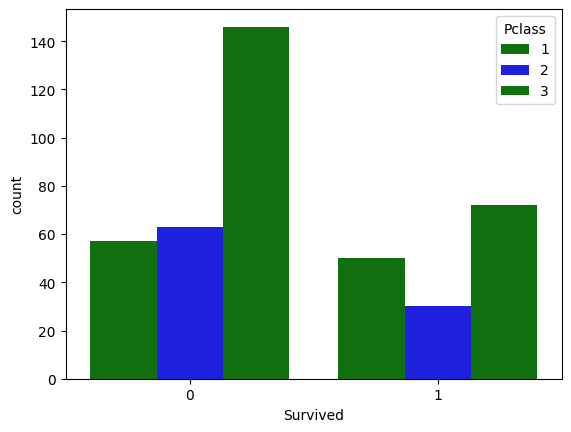

In [ ]:
#Visualization of survivals
sns.countplot(x=data['Survived'], hue=data['Pclass'], palette=['green', 'blue'])


In [ ]:
data['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [ ]:
data['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

<Axes: xlabel='Survived', ylabel='count'>

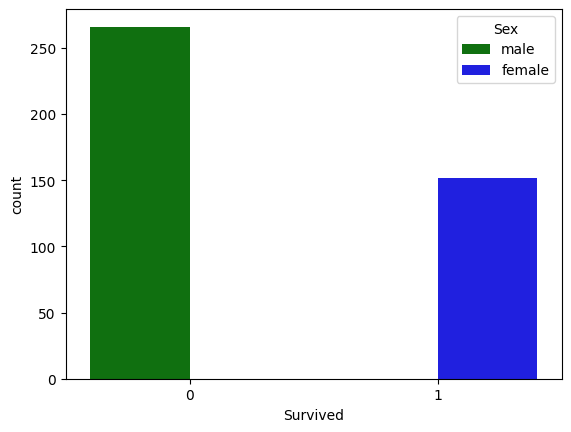

In [ ]:
sns.countplot(x=data['Survived'], hue=data['Sex'], palette=['green', 'blue'])


In [ ]:
data['Ticket']

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object

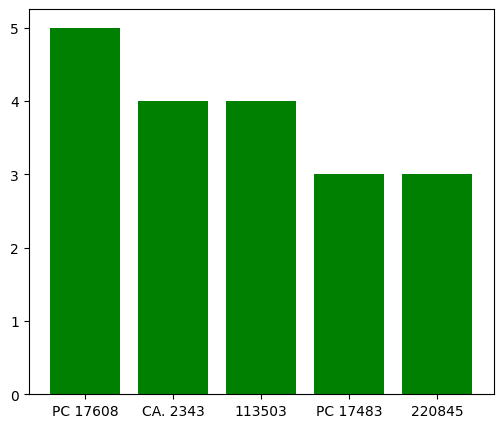

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(list(data['Ticket'].value_counts()[0:5].keys()),list(data['Ticket'].value_counts()[0:5]),color='g')
plt.show()

In [ ]:
data['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [ ]:
data['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [ ]:
data['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [ ]:
#survival rate by Age
data.groupby('Age')[['Survived']].mean()

,Survived
Age,
0.17,1.000000
0.33,0.000000
0.75,0.000000
0.83,0.000000
0.92,1.000000
...,...
62.00,0.000000
63.00,0.500000
64.00,0.666667


In [ ]:
#survival rate by Sex
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Sex']= labelencoder.fit_transform(data['Sex'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


**Data** **cleaning**

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data=data.drop(['Age'], axis=1)

In [ ]:
data_final= data
data_final.head(15)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",1,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",1,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",1,2,0,A/4 48871,24.1500,NaN,S


**Model** **Prediction**

In [ ]:
x= data[['Pclass', 'Sex']]
y= data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=42)
log.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
pred = print(log.predict(x_test))

[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1]


In [ ]:
print(y_test)

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64
